In [2]:
#Prueba de red neuronal con Tensor flow y su API Keras
import tensorflow as tf
from tensorflow import keras

#Cargar dos liberias adicionales
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

2.10.0


In [4]:
#Cargar una set de datos de MINIST(Base de datos) de ropas, este set de datos lleva imagenes de ropa 
# y sus etiquetas para poder identificador el tipo de ropa, son 10 en total.

fashion_week = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_week.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
#Crear dos listas con las etiquetas
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names_ESP = ['Camiseta', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo',
                  'Sandalia', 'Camisa', 'bambas', 'Bolso', 'Botas']

In [9]:
# Explorar el Set de Datos
train_images.shape

(60000, 28, 28)

In [11]:
# Cantidad de etiquetas
len(train_labels)

60000

In [13]:
#Cada etiqueta es un numero entre 0 y 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
#Para ver la carpeta se encuentra la data en el local
print (fashion_week)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\formacio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>


In [10]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_images)

10000

In [16]:
#Cada etiqueta es un numero entre 0 y 9
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

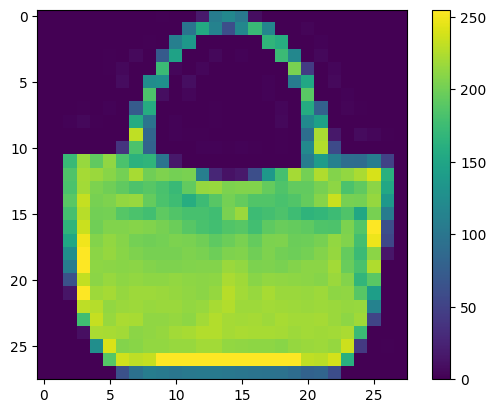

La etiqueta asociada tiene un valor de 8
La clasificacion de está imagen es Bolso


In [25]:
#Visualizar la primera imagen
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

#Imprimir la etiqueta y la clasificacion
print("La etiqueta asociada tiene un valor de " + str(train_labels[100]))
print("La clasificacion de está imagen es " + str(class_names_ESP[train_labels[100]]))


In [27]:
#Crear una funcion para que pasando el numero de imagen me la muestre

def muestra_imagen_train(x):
    plt.figure()
    plt.imshow(train_images[x])
    plt.colorbar()
    plt.grid(False)
    plt.show
    
    #Imprimir la etiqueta
    pieza_ropa = class_names[train_labels[x]]
    pieza_ropa_ESP = class_names_ESP[train_labels[x]]
    
    print("Esta ropa es en ingles " + pieza_ropa)
    print("Esta ropa es en español " +  pieza_ropa_ESP)

Esta ropa es en ingles T-shirt
Esta ropa es en español Camiseta


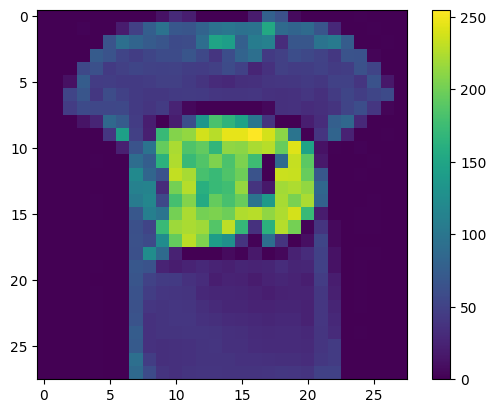

In [30]:
muestra_imagen_train(1525)

In [31]:
#Escalar los valores  en un rango entre 0 y 1, antes de alimentarlo al modelo de datos
#Para realizarlo se dividira entre 255 (Esto hay que hacerlo para las imagenes de entreno y para el test)
train_images = train_images/255.0
test_images = test_images/255.0

<function matplotlib.pyplot.show(close=None, block=None)>

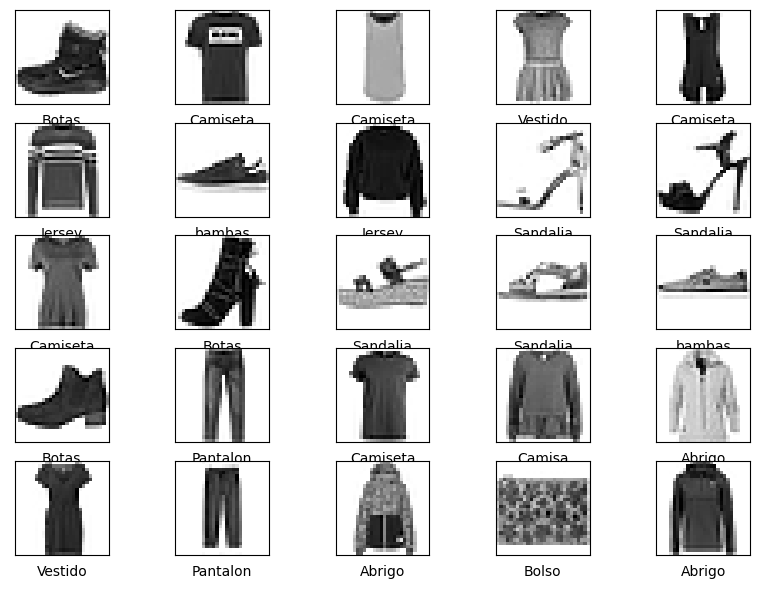

In [40]:
#Para verificar que el set de datos esta en el formato adecuado y que estan lista para construir y entrenar la red neuronal
#Se veran las primeras 25 imagenes
#Se pondran el nombre de cada clase debajo de la imagen

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(7,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid=False
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names_ESP[train_labels[i]])
    
plt.show

In [53]:
# Crear la red neuronal, las capas sn los layers
#Flatten significa aplanar todas las dimensiones excepto 1

model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), # Capa de entrada
                          keras.layers.Dense(128, activation = 'relu'), # Capa oculta
                          keras.layers.Dense(10, activation = 'softmax')]) # Capa de salida

In [57]:
#Compilar el modelo

model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']) # cada imagen con la etiqueta, da el % de acierto

In [63]:
#Entro del modelo con el fit, importante definir el numero de epochs
#epochs nunmero de veces o periodo que se va a entrenar

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0945 - accuracy: 0.9644
Epoch 2/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.0963 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0939 - accuracy: 0.9647
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0909 - accuracy: 0.9652
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0879 - accuracy: 0.9669
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0912 - accuracy: 0.9663
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0869 - accuracy: 0.9674
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0842 - accuracy: 0.9680
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0864 - accuracy: 0.9675
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0

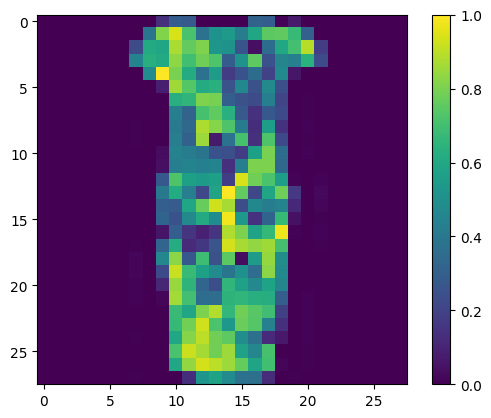

3
Vestido


In [67]:
#Ver las imagenes del Test

plt.figure()
plt.imshow(test_images[100])
plt.colorbar()
plt.grid = False
plt.show()

#Imprimir la etiqueta
print (test_labels[100])
print(class_names_ESP[test_labels[100]])

In [79]:
def muestra_imagen_test(x):
    plt.figure()
    plt.imshow(test_images[x])
    plt.colorbar()
    plt.grid = False
    plt.show()
    
    #Imprimir la etiqueta y el tipo de ropa
    pieza_ropa2 = class_names[test_labels[x]]
    pieza_ropa2_ESP = class_names_ESP[test_labels[x]]
    print ("El numero de la etiqueta  es " + str(test_labels[x]))
    print ("El numero de ropa en ingles es " + pieza_ropa2)
    print ("El numero de ropa en español es " + pieza_ropa2_ESP)

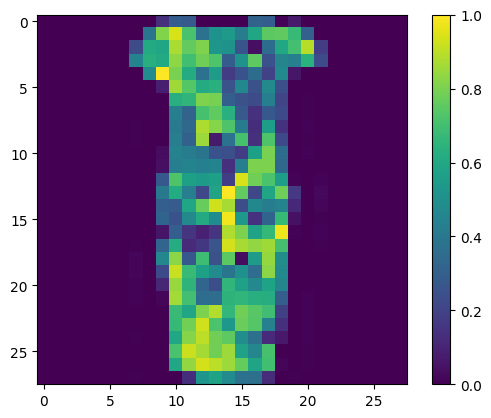

El numero de la etiqueta  es 3
El numero de ropa en ingles es Dress
El numero de ropa en español es Vestido


In [80]:
muestra_imagen_test(100)

In [74]:
#Evaluar la exactitud, comparar el rendimiento del modelo sobre el set de data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print (test_loss)
print (test_acc)

313/313 - 0s - loss: 0.5524 - accuracy: 0.8901 - 327ms/epoch - 1ms/step
0.552385151386261
0.8901000022888184


In [75]:
#Predecir el modelo sobre el set de datos de Test (10.000 imagenes)
prediccion = model.predict(test_images)

#El modelo va a predicir la etiqueta para cada imagen
prediccion[100]

313/313 [==============================] - 0s 692us/step


array([2.2130924e-05, 2.8103867e-15, 8.0895353e-11, 9.9997783e-01,
       4.1321160e-15, 4.2899402e-15, 1.2319210e-08, 2.0249633e-23,
       4.6428885e-14, 1.0779740e-19], dtype=float32)

In [77]:
#Como ver el valor mas alto
np.argmax(prediccion[100])
print (class_names_ESP[np.argmax(prediccion[100])])

Vestido


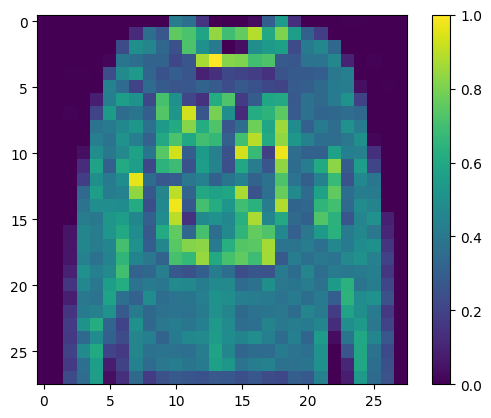

El numero de la etiqueta  es 2
El numero de ropa en ingles es Pullover
El numero de ropa en español es Jersey


In [81]:
muestra_imagen_test(500)

In [82]:
np.argmax(prediccion[100])
print (class_names_ESP[np.argmax(prediccion[500])])

Jersey


1/1 [==============================] - 0s 36ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

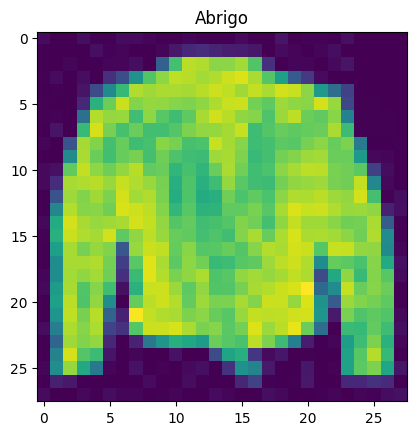

In [83]:
#Probar una imagen que no esta en el set de datos
#Abrir la imagen en jpg y se le hara resize a 28 pixels
from PIL import Image
basewidth = 28
img = Image.open('chupa.jpg')
hsize = basewidth
img = img.resize((basewidth, hsize))

#Se va convertir en blanco y negro
imbw = np.array(Image.open('resized_chupa.jpg').convert('L'))

#Se transforma en un array
data = np.array(imbw)

#Invertir los colores
data = 1-data/255.0

plt.figure()
plt.imshow(data)
plt.colorbar
plt.grid = False
#plt.show

#Se realizara la prediccion con el modelo de entrenado
prediccion2 = model.predict(data)
plt.title(class_names_ESP[np.argmax(prediccion2)])
plt.show